In [66]:
# Import the packages
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px

In [3]:
# Connect with the MongoDB Server
client = pymongo.MongoClient('localhost', 27017)
db = client['comp6235']
all_weather = db['all_weather']
london_historical_weather = db['london_historical_weather']
uk_energy = db['uk_energy']

In [21]:
query = [{'$match':{'city_name':{'$eq':'London'}}}]
r = all_weather.aggregate(query)
d = pd.DataFrame(list(r))
d

,_id,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,6572a97e5bffd97e20d20844,3772,London,2013-01-02,Winter,6.9,2.0,10.9,0.0,0.0,239.0,14.6,0.0,0.0,0.0
1,6572a97e5bffd97e20d20845,3772,London,2013-01-03,Winter,10.6,8.5,11.3,0.3,0.0,256.0,18.6,0.0,0.0,0.0
2,6572a97e5bffd97e20d20846,3772,London,2013-01-04,Winter,9.6,8.2,10.4,0.0,0.0,262.0,17.4,0.0,1037.4,0.0
3,6572a97e5bffd97e20d20847,3772,London,2013-01-05,Winter,9.2,8.0,10.8,0.0,0.0,240.0,14.1,0.0,1035.3,0.0
4,6572a97e5bffd97e20d20848,3772,London,2013-01-06,Winter,7.3,6.0,8.9,0.3,0.0,211.0,9.9,0.0,1032.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,6572a97e5bffd97e20d21681,3772,London,2022-12-26,Winter,6.8,3.4,10.4,1.5,0.0,240.0,19.7,54.0,1015.6,0.0
3646,6572a97e5bffd97e20d21682,3772,London,2022-12-27,Winter,6.9,1.9,10.8,0.0,0.0,205.0,18.7,57.0,1019.3,0.0
3647,6572a97e5bffd97e20d21683,3772,London,2022-12-28,Winter,10.7,8.2,12.0,5.8,0.0,203.0,26.7,57.0,1001.9,0.0
3648,6572a97e5bffd97e20d21684,3772,London,2022-12-29,Winter,8.5,6.0,11.7,4.1,0.0,222.0,26.8,58.0,1000.9,0.0


## Comparison in 3 main cities in UK

In [32]:
query_uk = [
    {'$match':{'city_name':{'$in':['London', 'Belfast', 'Edinburgh',]}}},
    {'$group':{
        '_id': '$city_name', 
        'avg_t':{'$avg':'$avg_temp_c'},
        'avg_max_t':{'$avg':'$max_temp_c'},
        'avg_min_t':{'$avg':'$min_temp_c'},
        'avg_wind':{'$avg':'$avg_wind_speed_kmh'},
        'avg_rain':{'$avg':'$precipitation_mm'}
    }},
]

result_uk = all_weather.aggregate(query_uk)
df_uk = pd.DataFrame(list(result_uk))
df_uk

,_id,avg_t,avg_max_t,avg_min_t,avg_wind,avg_rain
0,Edinburgh,9.280049,12.652809,5.474459,17.485887,1.813428
1,Belfast,9.630474,12.929104,6.704823,15.240723,2.198219
2,London,11.912795,15.915534,8.101096,14.343288,1.696384


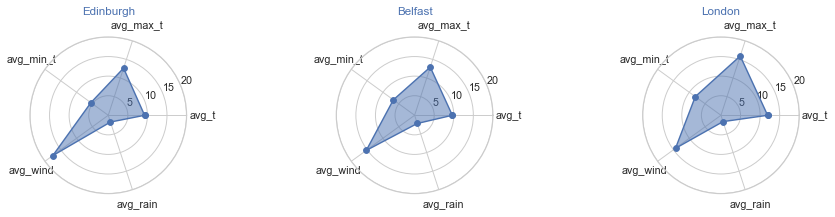

In [57]:
# Data Selection
city_labels = df_uk['_id'].tolist()
categories = ['avg_t', 'avg_max_t', 'avg_min_t', 'avg_wind', 'avg_rain']
data = df_uk[categories].values

N = 5
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
fig=plt.figure(figsize=(16,8),dpi=70)

for i in range(len(data)):
    values = df_uk.iloc[i,1:].to_list()
    values.append(values[0])
    position = "23" + str(i+1)
    ax = fig.add_subplot(int(position), polar=True)
    ax.plot(angles, values, 'o-')
    ax.fill(angles, values, alpha=0.5)
    ax.set_thetagrids(angles[:-1] * 180 / np.pi, df_uk.columns[1:].to_list())
    ax.set_title(df_uk.iloc[i, 0], color='b')
    ax.set_ylim(0, 20)
plt.subplots_adjust(hspace=0.7)


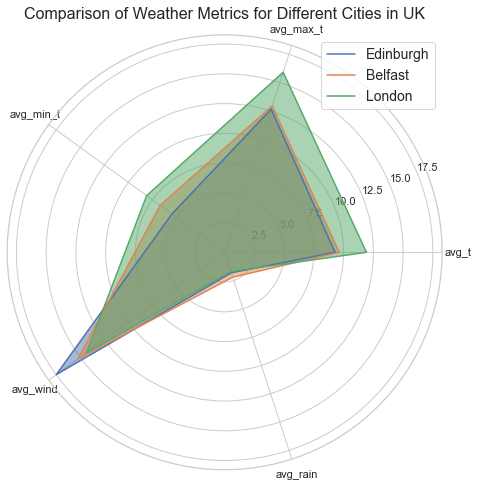

In [71]:
# Data Selection
city_labels = df_uk['_id'].tolist()
categories = ['avg_t', 'avg_max_t', 'avg_min_t', 'avg_wind', 'avg_rain']
data = df_uk[categories].values

N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# Radar Chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i in range(len(data)):
    values = df_uk.iloc[i, 1:].to_list()
    values.append(values[0])
    ax.plot(angles, values, label=df_uk.iloc[i, 0])
    ax.fill(angles, values, alpha=0.5)

ax.set_thetagrids(angles[:-1] * 180 / np.pi, df_uk.columns[1:].to_list())
ax.legend(loc='upper right', fontsize=14)
plt.title('Comparison of Weather Metrics for Different Cities in UK', fontsize=16)
plt.show()

## 

## Comparison between some Main City in Europe

### About the same latitude

In [88]:
query_cities = [
    {'$match':{'city_name':{'$in':['London', 'Paris', 'Berlin', 'Rome', 'Madrid', 'Athens', 'Prague', 'Brussels']}}},
#     {'$group':{
#         '_id':'$city_name',
#          'avg_t':{'$avg':'$avg_temp_c'},
#         'avg_max_t':{'$avg':'$max_temp_c'},
#         'avg_min_t':{'$avg':'$min_temp_c'},
#         'avg_wind':{'$avg':'$avg_wind_speed_kmh'},
#         'avg_rain':{'$avg':'$precipitation_mm'},
#     }}
    {'$project':{'_id':0, 'city_name':1, 'date':1, 'avg_temp_c':1}},
    {'$sort':{'_id':1}}
]

result_cities = all_weather.aggregate(query_cities)
df_cities = pd.DataFrame(list(result_cities))
df_cities

,city_name,date,avg_temp_c
0,Brussels,2013-01-02,5.5
1,Brussels,2013-01-03,9.1
2,Brussels,2013-01-04,8.5
3,Brussels,2013-01-05,7.2
4,Brussels,2013-01-06,7.9
...,...,...,...
28319,London,2022-12-26,6.8
28320,London,2022-12-27,6.9
28321,London,2022-12-28,10.7
28322,London,2022-12-29,8.5


### Visualise it

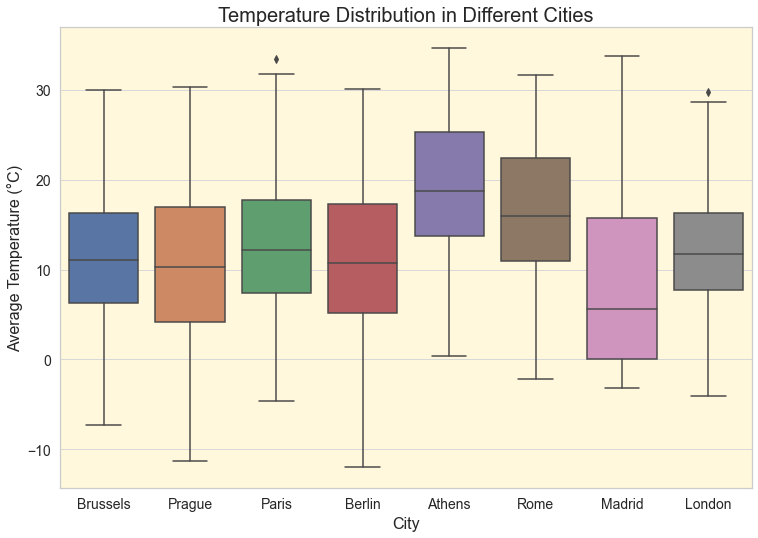

In [94]:
all_cities = pd.DataFrame({'City': df_cities['city_name'].unique()})

# Box Chart
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y",c=(217/256,217/256,217/256)) 
plt.rcParams['axes.facecolor'] = '#FFF8DC'

sns.boxplot(x='city_name', y='avg_temp_c', data=df_cities)
plt.title('Temperature Distribution in Different Cities', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Average Temperature (°C)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()